In [ ]:
import pandas as pd
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
)

In [2]:
X_test = pd.read_pickle(r'D:\Big Data Alzheimer Prediction Project\Alzheimer-Prediction-System\outputs\preprocessed\X_test.pkl')
y_test = pd.read_pickle(r'D:\Big Data Alzheimer Prediction Project\Alzheimer-Prediction-System\outputs\preprocessed\y_test.pkl')
xgb_model = joblib.load(r'D:\Big Data Alzheimer Prediction Project\Alzheimer-Prediction-System\outputs\models\xgboost_model.pkl')


In [3]:
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]  

In [5]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

comparison_df.head(15)

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,1,1
4,1,1
5,1,1
6,0,0
7,1,1
8,1,1
9,1,1


In [6]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9136690647482014
Precision: 0.93
Recall: 0.8942307692307693
F1 Score: 0.9117647058823529

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       209
           1       0.93      0.89      0.91       208

    accuracy                           0.91       417
   macro avg       0.91      0.91      0.91       417
weighted avg       0.91      0.91      0.91       417



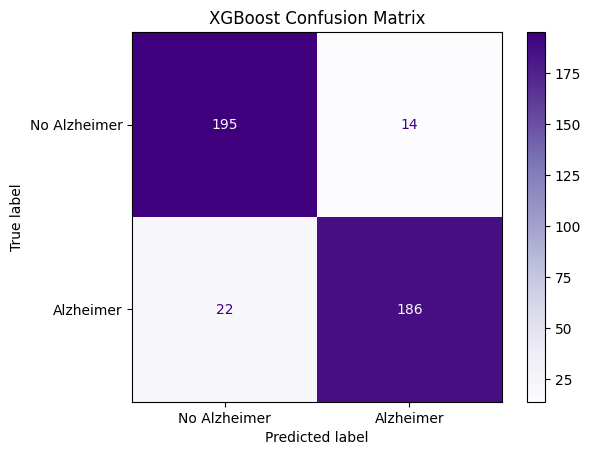

In [7]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Alzheimer', 'Alzheimer'])
disp.plot(cmap='Purples', values_format='d')
plt.title('XGBoost Confusion Matrix')
plt.show()

In [8]:
prob_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Prediction_Probability': y_proba
})

prob_df.head(10)


,Actual,Predicted,Prediction_Probability
0,0,0,0.010877
1,1,1,0.998599
2,0,0,0.367403
3,1,1,0.993627
4,1,1,0.984386
5,1,1,0.947199
6,0,0,0.008391
7,1,1,0.997813
8,1,1,0.983374
9,1,1,0.999640


In [9]:
os.makedirs(r'D:\Big Data Alzheimer Prediction Project\Alzheimer-Prediction-System\outputs\evaluation', exist_ok=True)
comparison_df.to_csv(r'D:\Big Data Alzheimer Prediction Project\Alzheimer-Prediction-System\outputs\evaluation\xgboost_predictions.csv', index=False)
print("Saved comparison results to: outputs/evaluation/xgboost_predictions.csv")

metrics_summary = {
    'Model': ['XGBoost'],
    'Accuracy': [accuracy_score(y_test, y_pred)],
    'Precision': [precision_score(y_test, y_pred)],
    'Recall': [recall_score(y_test, y_pred)],
    'F1_Score': [f1_score(y_test, y_pred)],
    'ROC_AUC': [roc_auc_score(y_test, y_proba)]
}

metrics_df = pd.DataFrame(metrics_summary)
metrics_df.to_csv(r'D:\Big Data Alzheimer Prediction Project\Alzheimer-Prediction-System\outputs\evaluation\xgboost_metrics_summary.csv', index=False)
print("Saved evaluation metrics to: outputs/evaluation/xgboost_metrics_summary.csv")

metrics_df

Saved comparison results to: outputs/evaluation/xgboost_predictions.csv
Saved evaluation metrics to: outputs/evaluation/xgboost_metrics_summary.csv


,Model,Accuracy,Precision,Recall,F1_Score,ROC_AUC
0,XGBoost,0.913669,0.93,0.894231,0.911765,0.952774
